In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.svm as svm
df = pd.read_csv('heart_Disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,NaN,2.0,130.0,250,0.0,1.0,187.0,0.0,3.5,0.0,NaN,2.0,1.0
2,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [3]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,True,False,False,False,False,False,False,False,False,False,True,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum(axis=0)

age         2
sex         4
cp          4
trestbps    3
chol        0
fbs         2
restecg     1
thalach     1
exang       2
oldpeak     2
slope       2
ca          2
thal        3
target      2
dtype: int64

Drop the rows

In [5]:
df2=df.dropna()
df2=df.dropna(axis=0)

In [6]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
2,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
6,56.0,0.0,1.0,140.0,294,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,0.0,0.0,124.0,197,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
299,45.0,1.0,3.0,110.0,264,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


Text(0.5, 1.0, 'Correlation On heart_Disease Dataset')

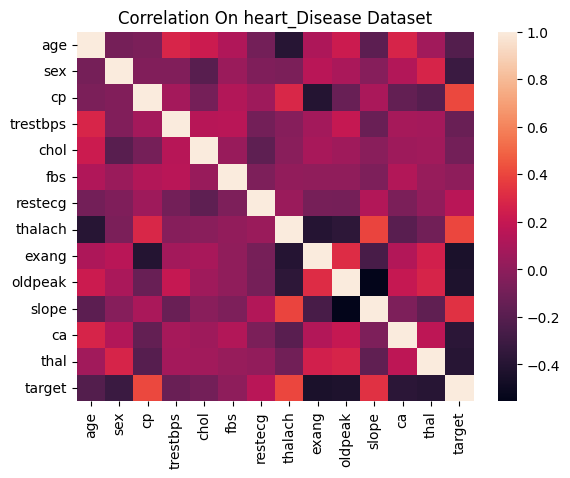

In [7]:
plt.figure(1)
sns.heatmap(df2.corr())
plt.title('Correlation On heart_Disease Dataset')

In [8]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded your housing dataset into variables X and Y
X=df2[['age','sex','cp','chol','fbs', 'restecg','exang','oldpeak', 'slope', 'ca','thal']]
Y=df2["target"]

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create and train the decision tree regressor

classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)


# Predict on the test set
y_pred = classifier.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70        32
         1.0       0.74      0.82      0.78        39

    accuracy                           0.75        71
   macro avg       0.75      0.74      0.74        71
weighted avg       0.75      0.75      0.74        71

[[21 11]
 [ 7 32]]
accuracy: 0.7464788732394366


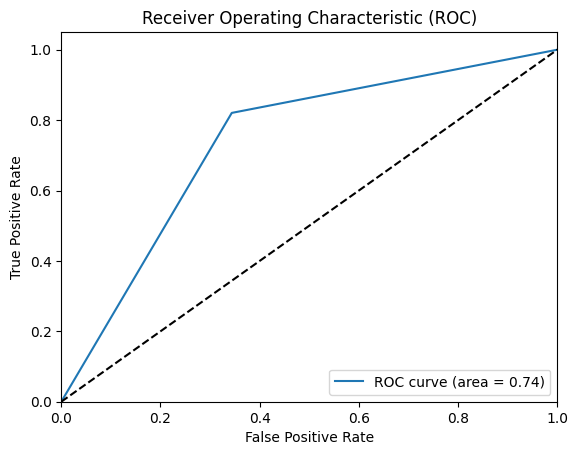

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the predicted probabilities of the positive class
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [12]:
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
y_pred = model.predict(X_test)


In [16]:
cm = confusion_matrix(y_test, y_pred)


In [17]:
print(cm)

[[75 14]
 [18 93]]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

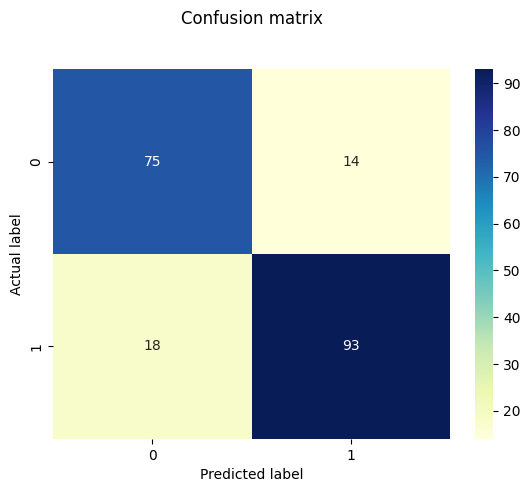

In [19]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

print("\n")

model_evaluation(y_test, y_pred, "DecisionTree")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,DecisionTree,0.84,0.869159,0.837838,0.853211,0.84392
